# Task 2

## General instructions

First, update the following cell to have a link to your Homework 1 GitHub repository

**UPDATE THIS LINK**
https://github.com/mariamkg00/eds220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Average Air Quality in Santa Barbara in 2017 to 2018'}, xlabel='Month', ylabel='Air Quality Index (PM in ppm)'>

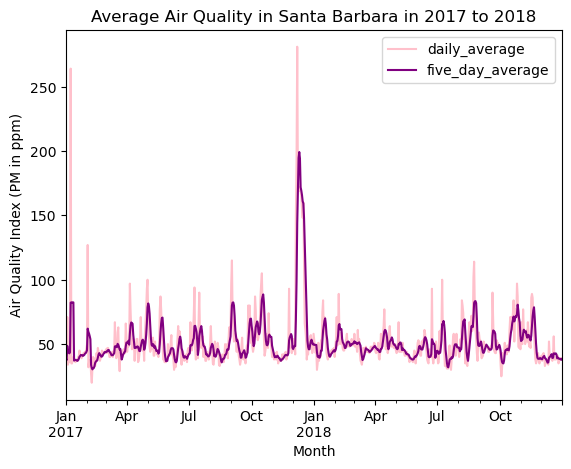

In [15]:
#import pandas as pd
import pandas as pd

#reading in the 2017 data from the URL
url = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip'
aqi_17 = pd.read_csv(url)

#reading in the 2018 data from the URL saved as url2
url2 = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip'
aqi_18 = pd.read_csv(url2)

# using pd.concat() to merge the two dataframes together
aqi = pd.concat([aqi_17, aqi_18])

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')

# filtering for data only from santa barbara
aqi_sb = aqi.loc[aqi['county_name'] == 'Santa Barbara']


#removing state_name, county_name, state_code, and county_code columns from aqi_sb using drop
aqi_sb = aqi_sb.drop(columns = ['state_name','county_name','state_code','county_code'])

#updating date column using to_datetime() function
aqi_sb.date = pd.to_datetime(aqi_sb.date)

#updating the index of aqi_sb using set_index
aqi_sb = aqi_sb.set_index('date')

# inserting a new column in the aqi_sb dataframe
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

# as of now we only have five day average, we need daily average.
aqi_sb['daily_average']= aqi_sb.aqi.resample('D').mean()

#making the plot, and adding a legend so that the two line plots can be told apart. 
aqi_sb.daily_average.plot(ylabel = 'Air Quality Index (PM in ppm)',
                   xlabel = 'Month',
                   title = 'Daily Air Quality in Santa Barbara in 2017 to 2018',
                   legend = True,
                   color = 'pink')
aqi_sb.five_day_average.plot(ylabel = 'Air Quality Index (PM in ppm)',
                   xlabel = 'Month',
                   title = 'Average Air Quality in Santa Barbara in 2017 to 2018',
                   legend = True,
                   color = 'purple')

## 1

1. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 
2. Under "Donwload Data" click on "Pre-generated Data Files"
3. Click on "Tables of Daily AQI"
4. Copy the URL to the 2017 Daily AQI **by County** zip file `daily_aqi_by_county_2017.zip`
5. In the next code cell read in the data from the URL using the `pd.read_csv` function and store it as `aqi_17`. 
6. In the same cell, read in the data for the 2018 Daily AQI by County zip file and store it as `aqi_18`.

In [2]:
# importing pandas
import pandas as pd

#reading in the 2017 data from the URL
url = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip'
aqi_17 = pd.read_csv(url)

#reading in the 2018 data from the URL 
url2 = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip'
aqi_18 = pd.read_csv(url2)

## 2 
(a) and (b) Use the next two cells to look at the head of both data frames.

(c) Use this cell to make some other preliminary data exploration of your choosing.

In [3]:
# using the head() function to view the first five rows of aqi_17
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


In [4]:
# using the head() function to view the first five rows of aqi_18
aqi_18.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,32,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,34,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,15,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,19,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,25,Good,PM2.5,01-003-0010,1


In [5]:
# using len() to see how many rows there are 

print(len(aqi_17))
print(len(aqi_18))


#using dtypes to see what type of data is stored in each column
aqi_17.dtypes
aqi_18.dtypes


326801
327537


State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object

## 3
We currently have two separate dataframes. For this exercise we will need to "glue" them one on top of the other. The pandas function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

👀 NOTE: When we concatenate like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the index of `aqi` ends in 327536 while it has 654338 rows.


In [6]:
# using pd.concat() to merge the two dataframes together
aqi = pd.concat([aqi_17, aqi_18])

#running aqi
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327532,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327533,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327534,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327535,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


## 4

Run the follwoing cell and read the comments to understand how the column names are being updated.

In [7]:
# initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()
print(aqi.columns, '\n')

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')
print(aqi.columns)

# as a "one liner" you could achieve this column name cleaning like this:
# aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state name', 'county name', 'state code', 'county code', 'date', 'aqi',
       'category', 'defining parameter', 'defining site',
       'number of sites reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object')


## 5 
In the next cell:
- Select only data from `Santa Barbara` county and store in a new variable `aqi_sb`.
- Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`. 
- Use the `dtypes` attribute to check the data types of the columns. What do you notice for the date column?

In [8]:
# filtering for data only from santa barbara
aqi_sb = aqi.loc[aqi['county_name'] == 'Santa Barbara']


#removing state_name, county_name, state_code, and county_code columns from aqi_sb using drop
aqi_sb = aqi_sb.drop(columns = ['state_name','county_name','state_code','county_code'])

#using dtypes to check attributes for remaining columns
aqi_sb.dtypes

date                         object
aqi                           int64
category                     object
defining_parameter           object
defining_site                object
number_of_sites_reporting     int64
dtype: object

I noticed that the date column is stored as a string, instead of a date time object. 

## 6
In the next cell:
1. Update the date column of `aqi_sb` to be a datetime object.
2. Update the index of `aqi_sb` to be the date column.

In [9]:
#updating date column using to_datetime() function
aqi_sb.date = pd.to_datetime(aqi_sb.date)

#updating the index of aqi_sb using set_index
aqi_sb = aqi_sb.set_index('date')

## 7
In the next cell, check that you've updated the index by accessing the index of `aqi_sb`  by running `aqi_sb.index`. Add in a comment what is the data type (dtype) of the index.

In [10]:
# checking the new index of aqi_sb
aqi_sb.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)

The data type of the index is 'dateime64[ns]', which means that the format is as follows:

`year-month-day`, but can be as precise down to nanoseconds. 

## 8
Run the next cell and read through the comments. They will explain how to do make an average over a rolling window.

- We can createCreate a new variable `five_day_average` with the mean of the AQI over a 5-day rolling window. To do this use the `rolling`
- 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html


In [11]:
# rolling() is a method for pandas.series that provides rolling window calculations
# the parameter '5D' indicates we want the window to be 5 days
# This is a lazy method (think groupby), we need to specify what we want to calculate over each window
# here we add the aggregator function mean()
# this indicates we want the mean over each window
# and we get a pd.Series as ouput
aqi_sb.aqi.rolling('5D').mean()

date
2017-01-01    39.000000
2017-01-02    37.500000
2017-01-03    48.666667
2017-01-04    45.000000
2017-01-05    43.400000
                ...    
2018-12-27    38.600000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    37.800000
2018-12-31    38.400000
Name: aqi, Length: 730, dtype: float64

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named 'five_day_average' to the `aqi_sb` dataframe. 

In [12]:
# inserting a new column in the aqi_sb dataframe
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

#checking to see if the new column was made 
aqi_sb.columns

Index(['aqi', 'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting', 'five_day_average'],
      dtype='object')

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Update the title and colors of the graph. Can you see the AQI going up during the Thomas Fire in December 2017?

<AxesSubplot:title={'center':'Average Air Quality in Santa Barbara in 2017 to 2018'}, xlabel='Month', ylabel='Air Quality Index (PM in ppm)'>

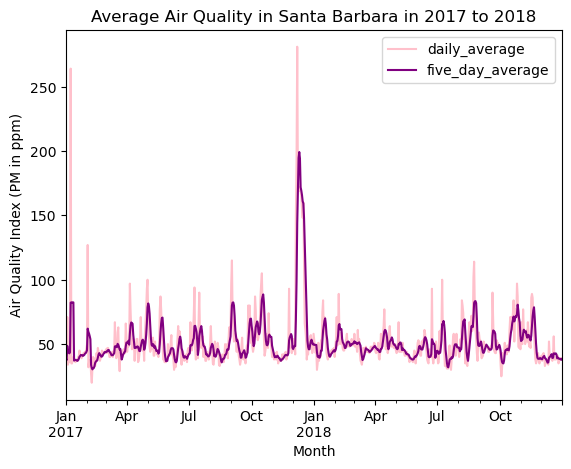

In [13]:
# as of now we only have five day average, we need daily average.
aqi_sb['daily_average']= aqi_sb.aqi.resample('D').mean()

aqi_sb.daily_average.plot(ylabel = 'Air Quality Index (PM in ppm)',
                   xlabel = 'Date',
                   title = 'Daily Air Quality in Santa Barbara in 2017 to 2018',
                   legend = True,
                   color = 'pink')
aqi_sb.five_day_average.plot(ylabel = 'Air Quality Index (PM in ppm)',
                   xlabel = 'Month',
                   title = 'Average Air Quality in Santa Barbara in 2017 to 2018',
                   legend = True,
                   color = 'purple')

## 11

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.